In [249]:
#import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

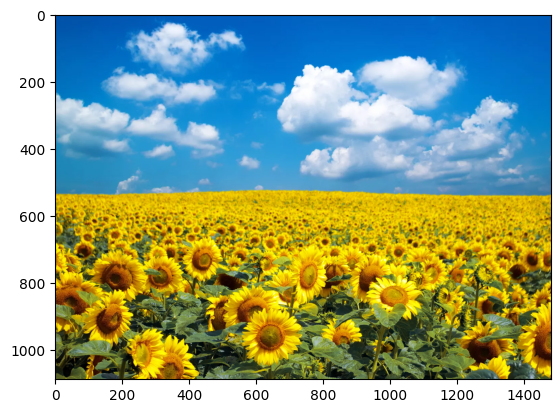

In [250]:
img = cv2.imread('images/Input.png', 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [251]:
print(img.shape)

(1087, 1480, 3)


In [252]:
hist = cv2.calcHist([img],[0],None,[256],[0,255])
print(hist.shape)

(256, 1)


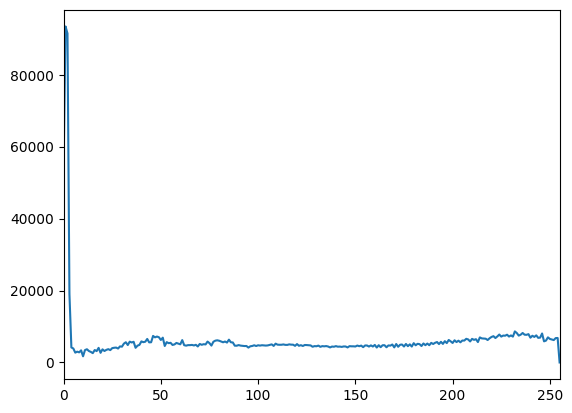

In [253]:
# Plot the histogram
plt.plot(hist)
# Limit the range to 0, 255
plt.xlim([0,255])
# Show the plot
plt.show()

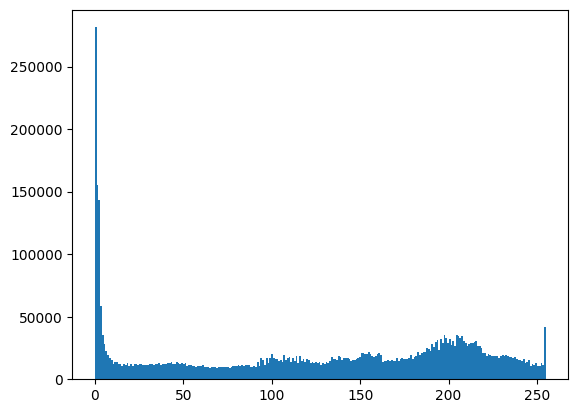

In [254]:
plt.hist(img.ravel(),256,[0,255]); plt.show()

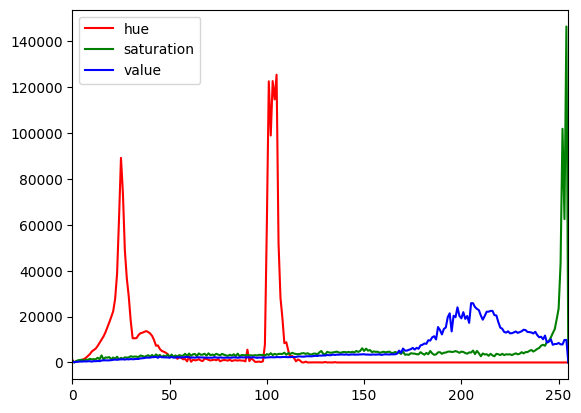

In [255]:
# Convert to HSV
img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

# Create a histogram of HSV values.

# Hue
hist = cv2.calcHist([img],[0],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='red')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Saturation
hist = cv2.calcHist([img],[1],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='green')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Value
hist = cv2.calcHist([img],[2],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='blue')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Add a legend
plt.legend(('hue','saturation','value'), loc = 'upper left')

# Plot a histogram.
plt.show()

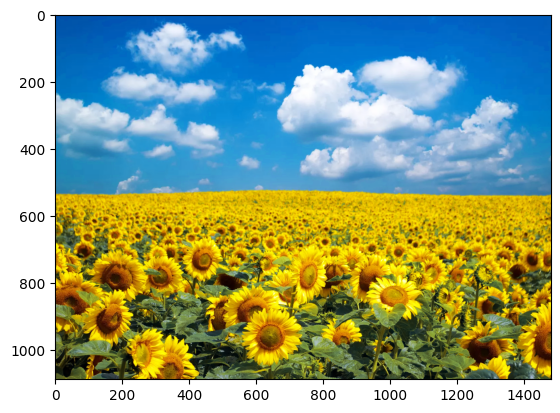

In [256]:
img = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)

# Show the image.
plt.imshow(img)

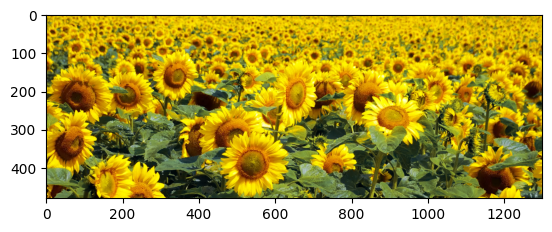

In [257]:
img_masked = img[570:1050,100:1400]
plt.imshow(img_masked)

(1087, 1480)


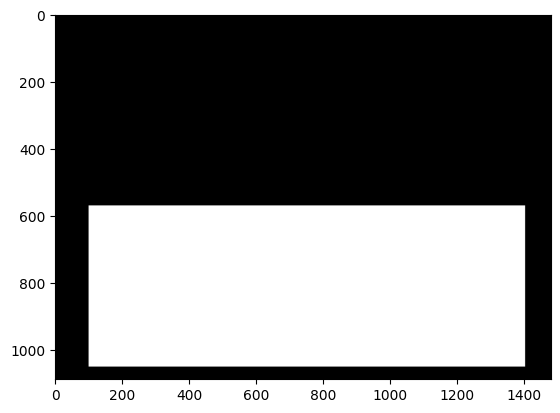

In [258]:
mask = np.zeros(img.shape[:2], np.uint8) 
mask[ 570:1050,100:1400] = 255
print(mask.shape)
plt.imshow(mask, cmap="gray")

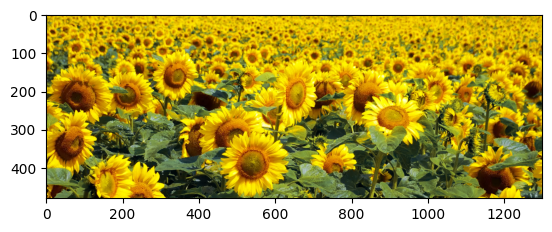

In [259]:
img_masked = img[570:1050,100:1400]

plt.imshow(img_masked)

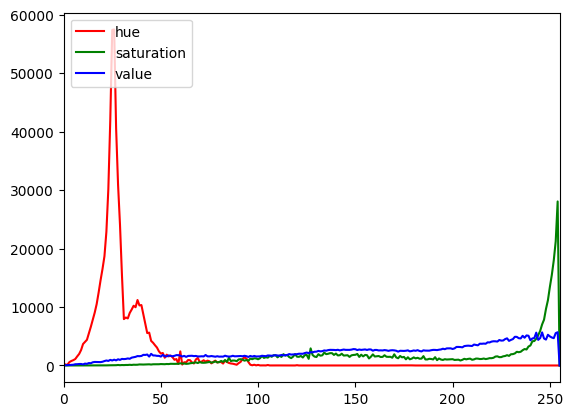

In [260]:
# Create a histogram of HSV values.
img_masked = cv2.cvtColor(img_masked, cv2.COLOR_RGB2HSV)


# Hue
hist = cv2.calcHist([img_masked],[0],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='red')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Saturation
hist = cv2.calcHist([img_masked],[1],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='green')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Value
hist = cv2.calcHist([img_masked],[2],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='blue')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Add a legend
plt.legend(('hue','saturation','value'), loc = 'upper left')

# Plot a histogram.
plt.show()

In [261]:
#Create an empty 2D array filled with zeros the same shape as our image.  Notice we are defining the data type as uint8 now!
mask = np.zeros(img.shape[:2], np.uint8) 

# Set the masked to white. Remember black is 0 and white is 255 is 8 bit color.

mask[570:1050,100:1400] = 255

# Image shape to confirm it's the same size as our image.
print(mask.shape)

(1087, 1480)


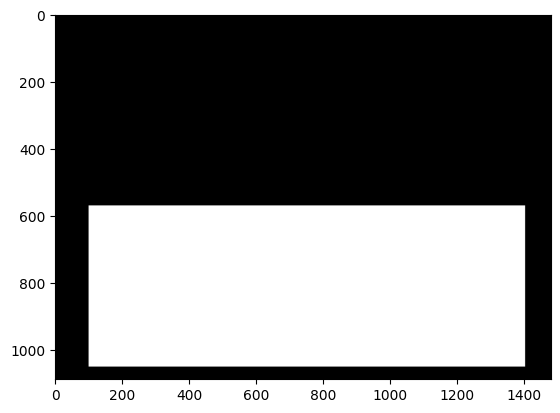

In [262]:
# Plot mask. Make sure you tell matplotlib that you it only contains gray values.  
plt.imshow(mask, cmap="gray")

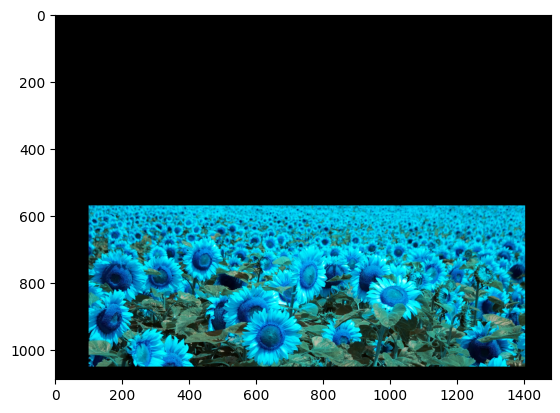

In [263]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# The bitwise AND operator ( & ) compares each bit of the first operand to the corresponding bit of the second operand. 
# If both bits are 1, the corresponding result bit is set to 1. Otherwise, the corresponding result bit is set to 0. 
# First image to compare.  Second image to compare.  Mask to use. 
img_masked = cv2.bitwise_and(img, img, mask=mask)

# Plot the masked image.
plt.imshow(img_masked)

In [264]:
#Stepping through the image.

#Save the height and width.
h = img.shape[0]
w = img.shape[1]
d = img.shape[2]

#A counting variable so we can keep track how many values we have.
count = 0

#Let's step through each pixel

#For each row in our grid. y = row
for y in range(0,h):
    #Search each pixel in the row. x = pixel
    for x in range(0,w):
       count+=1

#Print the total number of pixels. 200x200 = 40000
print(count)

#Reintialize the counting variable
count = 0

#Let's step through each RBG value.

#For each row in our grid. y = row
for y in range(0,h):
    #Search each pixel in the row. x = pixel
    for x in range(0,w):
        #Search each RGB value.
        for z in range(0,d):
             count+=1

#Print the total number of RGB values. 200x200x3 = 120000   
print(count)

1608760
4826280


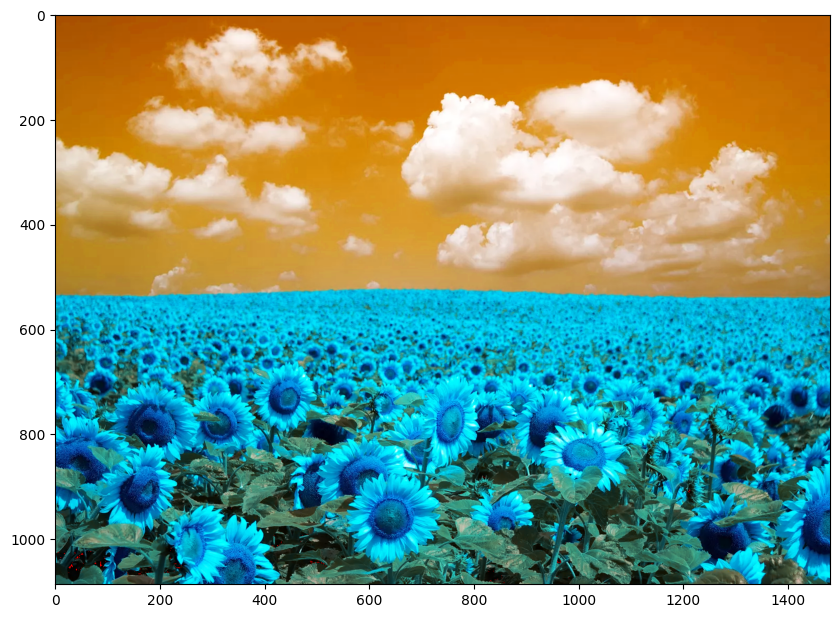

In [265]:
#Let's turn the black pixels red to show there location.
import copy

#Let's save a copy of the image.
imgRed = copy.deepcopy(img)

#Save the RGB value for red.
red = np.array([255,0,0])

#For each row in our grid.
for y in range(0,h):
    #Search each pixel in the row.
    for x in range(0,w):
        #If the RGB values equal black.
        if np.array_equal(imgRed[y,x],black):
            #Turn the black pixel red.
            imgRed[y,x] = red

#Draw the image.  Use matplotlib while using a python notebook. 

plt.figure(figsize=(10,10))
plt.imshow(imgRed)

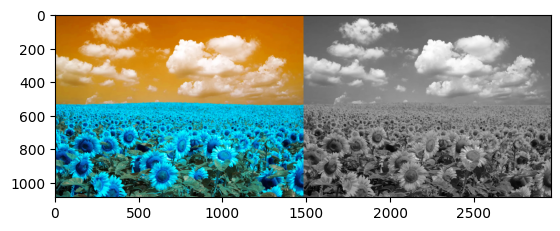

In [266]:
#Let's turn our image grayscale.

#Let's copy our image 
imgGrey = copy.deepcopy(img)


#For each row in our grid.
for y in range(0,h):
    #Search each pixel in the row
    for x in range(0,w):

        #Converting the color image to greyscale.  Average method.  Divide R,G,B values by 3 and sum them. 
        imgGrey[y,x,0] = img[y,x,0]/3 + img[y,x,1]/3 + img[y,x,2]/3
        imgGrey[y,x,1] = img[y,x,0]/3 + img[y,x,1]/3 + img[y,x,2]/3
        imgGrey[y,x,2] = img[y,x,0]/3 + img[y,x,1]/3 + img[y,x,2]/3
    
    
#Combine the greyscale and the original image so they can be displayed at the same time.  axis=0 for vertical axis=1 for horizontal alignment.
imgTwo = np.concatenate((img, imgGrey), axis=1)

#Draw the image.  Use matplotlib while using a python notebook. 
plt.imshow(imgTwo)

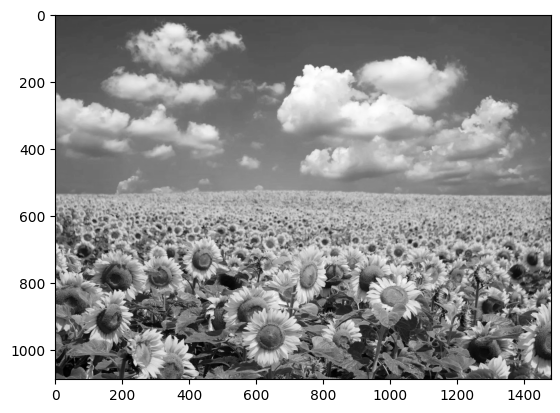

In [267]:
#Now the OpenCv way to covert to grayscale.

#Convert all the pixels to greyscale values
imgOcvGrey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Convert back to RGB to display with plt
imgOcvGrey = cv2.cvtColor(imgOcvGrey, cv2.COLOR_BGR2RGB)

plt.imshow(imgOcvGrey)

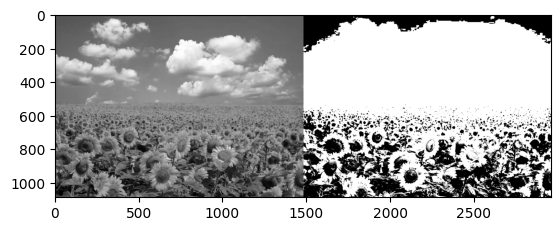

In [268]:
#Threshold filter on our image. 

#Save the height, width, and channel depth.
h = img.shape[0]
w = img.shape[1]
d = img.shape[2]

#Let's copy our image and create a blank image array to store our threshold.
imgGrey = copy.deepcopy(img)
imgThres = np.zeros((img.shape[0],img.shape[1],img.shape[2]), dtype=np.uint8)

#For each row in our grid.
for y in range(0,h):
    #Search each pixel in the row
    for x in range(0,w):
    
        #Converting the color image to greyscale.  Average method.  Divide R,G,B values by 3 and sum them. 
        imgGrey[y,x,0] = img[y,x,0]/3 + img[y,x,1]/3 + img[y,x,2]/3
        imgGrey[y,x,1] = img[y,x,0]/3 + img[y,x,1]/3 + img[y,x,2]/3
        imgGrey[y,x,2] = img[y,x,0]/3 + img[y,x,1]/3 + img[y,x,2]/3

        #Converting a color image to greyscale.  Weighted Method. Weight according to there wavelengths  Formula = ((Red value X 0.299) + (Green value X 0.587) + (Blue value X 0.114)) 
        # imgThres[y,x,0] = img[y,x,0] * 0.299 + img[y,x,1] * 0.587 + img[y,x,2] * 0.114
        # imgThres[y,x,1] = img[y,x,0] * 0.299 + img[y,x,1] * 0.587 + img[y,x,2] * 0.114
        # imgThres[y,x,2] = img[y,x,0] * 0.299 + img[y,x,1] * 0.587 + img[y,x,2] * 0.114

        #Threshold filter on the pixel.

        #If the pixel value is above 100 set it to white.  If it is below 100 set it to black.
        if (imgGrey[y,x,0] > 100):
            imgThres[y,x] = white
        else:
            imgThres[y,x] = black
        

#Combine the greyscale and the threshold image so they can be displayed at the same time.  axis=0 for vertical axis=1 for horizontal alignment.
imgTwo = np.concatenate((imgGrey, imgThres), axis=1)

#Use matplotlib while using a python notebook. Draw the image.
plt.imshow(imgTwo)


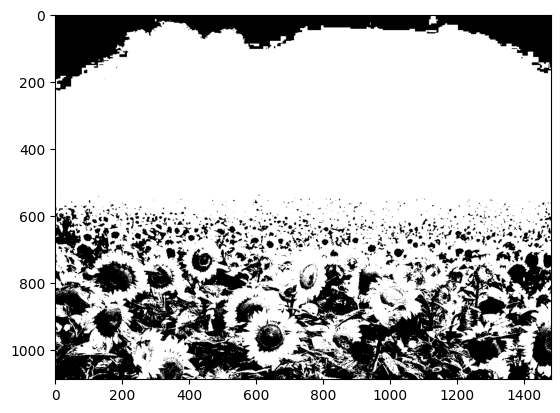

In [269]:
# OpenCv Threshold filter

th, imgOcvThres = cv2.threshold(imgGrey, 100, 255, cv2.THRESH_BINARY);
plt.imshow(imgOcvThres)

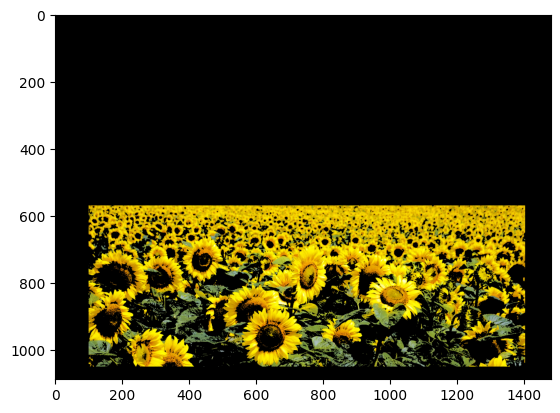

In [270]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# The bitwise AND operator ( & ) compares each bit of the first operand to the corresponding bit of the second operand. 
# If both bits are 1, the corresponding result bit is set to 1. Otherwise, the corresponding result bit is set to 0. 
# First image to compare.  Second image to compare.  Mask to use. 
img_masked = cv2.bitwise_and(img, imgOcvThres, mask=mask)

# Plot the masked image.
plt.imshow(img_masked)